In [46]:
# Importing the libraries to work with

# Getting and preparing the data
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Fitting the model curve
from scipy.optimize import curve_fit

In [47]:
# Defining the model function for data fitting: simple exponential
def f_pan(t,a,b):
    return (a*np.exp(b*t))

In [48]:
#Importing the data
data_raw = pd.read_csv("tau23062020.csv")
#display(data_raw)

# Selecting and preparing data to plot. Columns to be used: cases, days_since_1st
days = np.array(data_raw.loc[:,"day_since_1st"])
cases = np.array(data_raw.loc[:,"cases"])

# Erasing NANs from dataset
cases = cases[~np.isnan(cases)]
#display(cases)
days = days[:len(cases)]

In [49]:
# Fitting the curve
pars, cov = curve_fit(f = f_pan, xdata = days, ydata = cases, p0=[0,0],bounds=(-np.inf,np.inf))

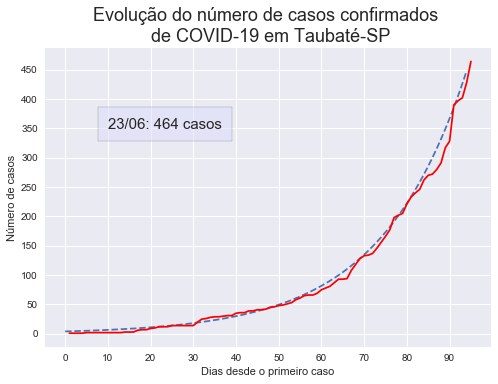

In [64]:
### Creating the plot
# annotations
fig = plt.figure()
ax = fig.add_subplot(111)
ax.text(10,350,'23/06: 464 casos',fontsize=15, bbox={'facecolor': '#ddddff', 'alpha': 0.5, 'pad': 10})


# data
plt.plot(f_pan(days,*pars), linestyle="--")     # Took parameters directly from curve_fit output
#plt.plot(fteste(days),linestyle='--')          # Since I was suspicious: I manually built a function to test the parameters correctness (they were allright)
plt.plot(days,cases,color='#ff0000')

# style and appearance
plt.style.use('seaborn')
plt.grid(True)
x_ticks_aux_var = 10                                                    # In these lines, I've only used a trick to get the
plt.xticks(x_ticks_aux_var*np.array(range(int(len(days)/x_ticks_aux_var+1))))     # desired axes ticks: took each set range, divided to
y_ticks_aux_var = 50                                                    # pass the result to range, and made an np.array with
plt.yticks(y_ticks_aux_var*np.array(range(int(max(cases)/y_ticks_aux_var+1))))    # them. Finally, re-multiplied to get the right scale
plt.title("Evolução do número de casos confirmados \n de COVID-19 em Taubaté-SP",fontsize=18)      # There probably are much bettter ways to do it
plt.xlabel("Dias desde o primeiro caso")
plt.ylabel("Número de casos");

In [51]:
a,b = pars
def fteste(t):
    return a*np.exp(b*t)

In [52]:
fteste(max(days)+10)

739.3367580515045